<a href="https://colab.research.google.com/github/Guisteim/MVP_PUC/blob/main/MVP_GuiStein_PUC_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizei o dataset - https://www.kaggle.com/datasets/andrewmvd/brazilian-stock-market/data

O objetivo deste projeto é realizar uma análise exploratória e estatística sobre os dados históricos de ações da Bolsa de Valores brasileira (B3), com foco especial em ações de empresas de grande relevância como PETR4 (Petrobras), MGLU3 (Magazine Luiza) e ITUB4 (Itaú Unibanco). A ideia é entender o comportamento dos preços ao longo do tempo, os volumes negociados e retornos financeiros diários.


In [30]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

# Carregando os dados
zip_url = "https://raw.githubusercontent.com/Guisteim/MVP_PUC/b48a0ace154b9b98f8aaecc0d172a7a60dfea25f/bovespa_stocks.zip"
response = requests.get(zip_url)
if response.status_code == 200:
  with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print("Arquivos dentro do ZIP:")
    print(z.namelist())
    with z.open('bovespa_stocks.csv') as csvfile:
            df = pd.read_csv(csvfile)
            print(df.head())
else:
    print("Erro ao baixar o arquivo ZIP:", response.status_code)

Arquivos dentro do ZIP:
['bovespa_stocks.csv']
         Date  Symbol    Adj Close        Close         High          Low  \
0  2022-10-03  SMAB11     8.360000     8.360000     8.370000     7.970000   
1  2010-01-04   MMXM3  1599.174927  1599.174927  1599.174927  1555.137817   
2  2010-01-05   MMXM3  1609.240479  1609.240479  1616.789795  1567.719849   
3  2010-01-06   MMXM3  1680.958008  1680.958008  1685.990845  1599.174927   
4  2010-01-07   MMXM3  1698.572876  1698.572876  1704.863892  1641.953735   

          Open   Volume  
0     8.000000    579.0  
1  1556.395996  20984.0  
2  1600.433105  22586.0  
3  1616.789795  37998.0  
4  1660.826782  33651.0  


Os dados foram coletados exclusivamente a partir de um arquivo `.zip` hospedado em um repositório do GitHub, com informações históricas extraídas da B3.

In [13]:
# Coleta e Analise de Dados
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031282 entries, 0 to 1031281
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1031282 non-null  object 
 1   Symbol     1031282 non-null  object 
 2   Adj Close  1031282 non-null  float64
 3   Close      1031282 non-null  float64
 4   High       1031282 non-null  float64
 5   Low        1031282 non-null  float64
 6   Open       1031282 non-null  float64
 7   Volume     1031282 non-null  float64
dtypes: float64(6), object(2)
memory usage: 62.9+ MB


,0
Date,0
Symbol,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


- Date: Data da negociação.
- Symbol: Código da ação negociada (ticker).
- Open: Preço de abertura da ação no dia.
- High: Maior preço registrado no dia.
- Low: Menor preço registrado no dia.
- Close: Preço de fechamento.
- Volume: Quantidade de ações negociadas.
- Return: Retorno diário calculado como `(Close / Open) - 1`.


In [25]:
# Pre-processamento dos Dados
df['Date'] = pd.to_datetime(df['Date'],utc=True, format='ISO8601')
df = df.dropna()
df['Symbol'] = df['Symbol'].str.strip()
df['Symbol'] = df['Symbol'].astype('category')
df['Return'] = df['Close'] / df['Open'] - 1

As datas estavam originalmente com timezone (`-02:00`), que foram convertidas corretamente para facilitar a manipulação. Nenhuma inconsistência visual foi percebida nas primeiras linhas, mas haviam valores ausentes.
Identifiquei valores nulos que foram removidos com `dropna()`.
Percebe-se que o volume médio varia muito entre ativos, e o preço de ações como MGLU3, PETR4 e ITUB4 têm comportamentos distintos.

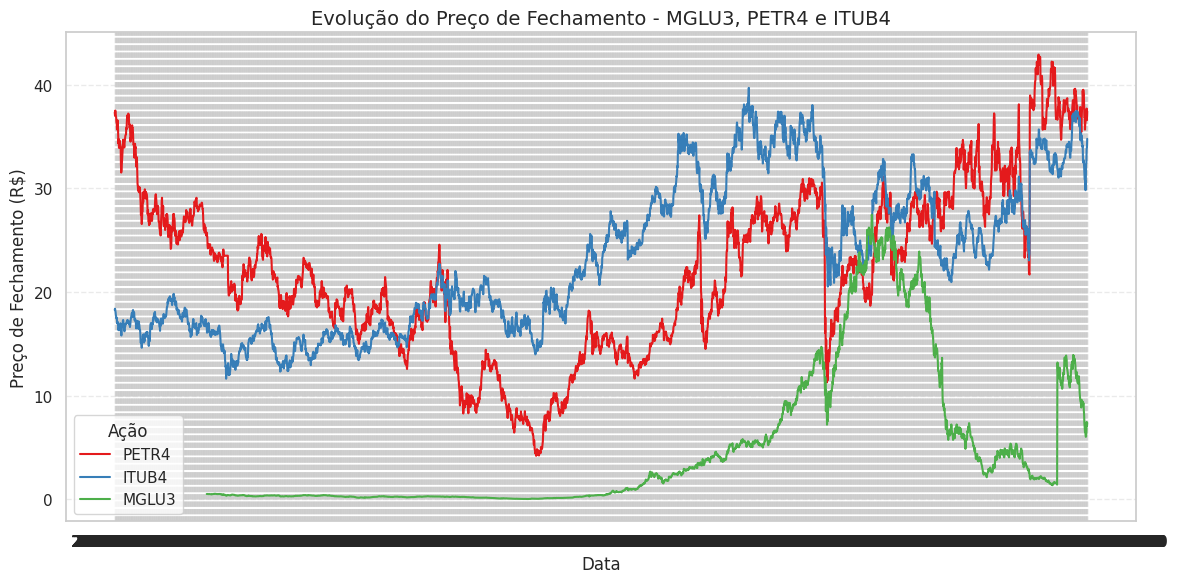

In [47]:
# Analise Exploratoria Dados
acoes = ['MGLU3', 'PETR4', 'ITUB4']
df_analise = df[df['Symbol'].isin(acoes)].copy()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_analise, x='Date', y='Close', hue='Symbol', palette='Set1')
plt.title('Evolução do Preço de Fechamento - MGLU3, PETR4 e ITUB4', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Ação')
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3704762952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volumes = df.groupby('Symbol')['Volume'].mean().sort_values(ascending=False)


<Axes: title={'center': 'Top 10 ações por volume médio'}, xlabel='Symbol'>

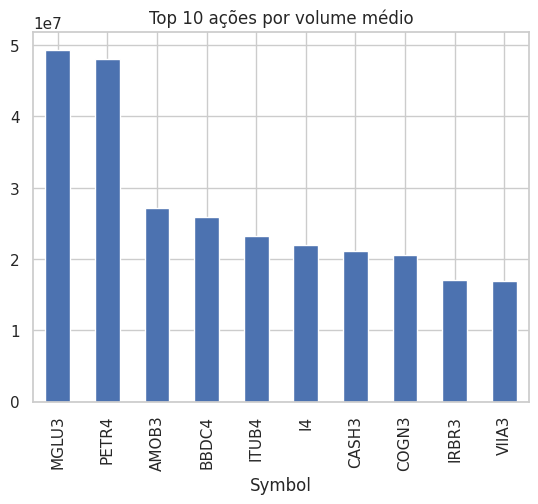

In [22]:
volumes = df.groupby('Symbol')['Volume'].mean().sort_values(ascending=False)
volumes.head(10).plot(kind='bar', title='Top 10 ações por volume médio')

Symbols present in filtered data: ['PETR4' 'ITUB4' 'MGLU3']
Tabela de Retornos Anuais (%)


Symbol,ITUB4,MGLU3,PETR4
Ano,,,
2010,-0.82,NaN,-26.88
2011,-14.34,-42.01,-20.41
2012,-1.94,30.64,-10.17
2013,2.31,-41.25,-13.26
2014,20.75,6.64,-40.12
2015,-14.39,-70.39,-28.42
2016,48.17,491.48,116.45
2017,26.99,530.97,9.82
2018,21.35,128.34,37.04


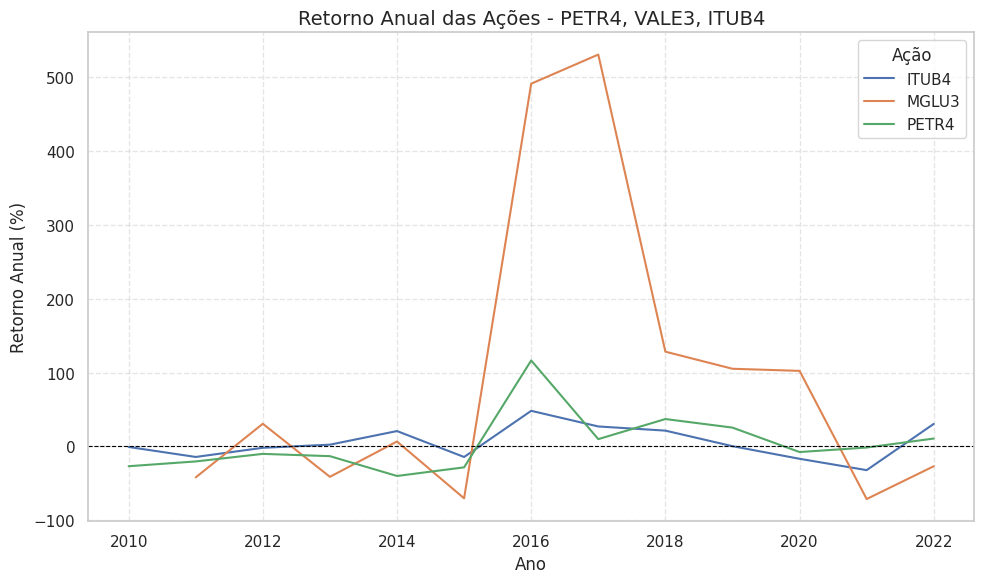

In [48]:
df['Symbol'] = df['Symbol'].str.strip()
acoes = ['PETR4', 'MGLU3', 'ITUB4']
df_filtrado = df[df['Symbol'].isin(acoes)].copy()
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'], errors='coerce')
df_filtrado.dropna(subset=['Date'], inplace=True)
present_symbols = df_filtrado['Symbol'].unique()
print(f"Symbols present in filtered data: {present_symbols}")
missing_symbols = [acao for acao in acoes if acao not in present_symbols]
if missing_symbols:
    print(f"Warning: Data for the following symbols is missing after filtering: {missing_symbols}")
# Criar coluna com o ano
df_filtrado['Ano'] = df_filtrado['Date'].dt.year

# Ordenar para garantir correto agrupamento
df_filtrado = df_filtrado.sort_values(['Symbol', 'Date'])

# Obter o primeiro e último valor de fechamento por ação/ano
primeiros = df_filtrado.groupby(['Symbol', 'Ano']).first()['Close']
ultimos = df_filtrado.groupby(['Symbol', 'Ano']).last()['Close']

# Calcular retorno anual
retorno_anual = (ultimos / primeiros - 1).reset_index()
retorno_anual.rename(columns={'Close': 'Retorno'}, inplace=True)
retorno_anual['Retorno (%)'] = (retorno_anual['Retorno'] * 100).round(2)
tabela_pivot = retorno_anual.pivot(index='Ano', columns='Symbol', values='Retorno')
tabela_pivot_percent = (tabela_pivot * 100).round(2)
print("Tabela de Retornos Anuais (%)")
display(tabela_pivot_percent)
plt.figure(figsize=(10, 6))
for acao in tabela_pivot_percent.columns:
    sns.lineplot(x=tabela_pivot_percent.index, y=tabela_pivot_percent[acao], label=acao)


plt.title('Retorno Anual das Ações - PETR4, VALE3, ITUB4', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Retorno Anual (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Ação')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # linha no zero
plt.tight_layout()
plt.show()